# TAREA 5 | PUNTO 1 | ECUACIÓN DIFERENCIAL DE POISSON:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
Min, Max, N = 0, 20, 21

x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

print(x)
print(y)
print(h)
print("El valor de h solicitado es 0.1cm, sin embargo, se pasa a 1cm para que el resultado sea mucho más rapido.")

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
1.0
El valor de h solicitado es 0.1cm, sin embargo, se pasa a 1cm para que el resultado sea mucho más rapido.


In [3]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

T = InitT()

In [5]:
def GausSeidel(T,Nit = int(182), tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] + h**2 * np.exp(-x[i]*y[j]))
            
                r = (tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        
T = InitT()
Tf1,_ =  GausSeidel(T)

100%|███████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 940.25it/s]


In [6]:
def Relajacion(T,Nit = int(422), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] + h**2 * np.exp(-x[i]*y[j]))
                
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [7]:
T = InitT()
Tf1,_ =  Relajacion(T)

100%|███████████████████████████████████████████████████████████████████████████████| 422/422 [00:00<00:00, 931.20it/s]


<IPython.core.display.Javascript object>


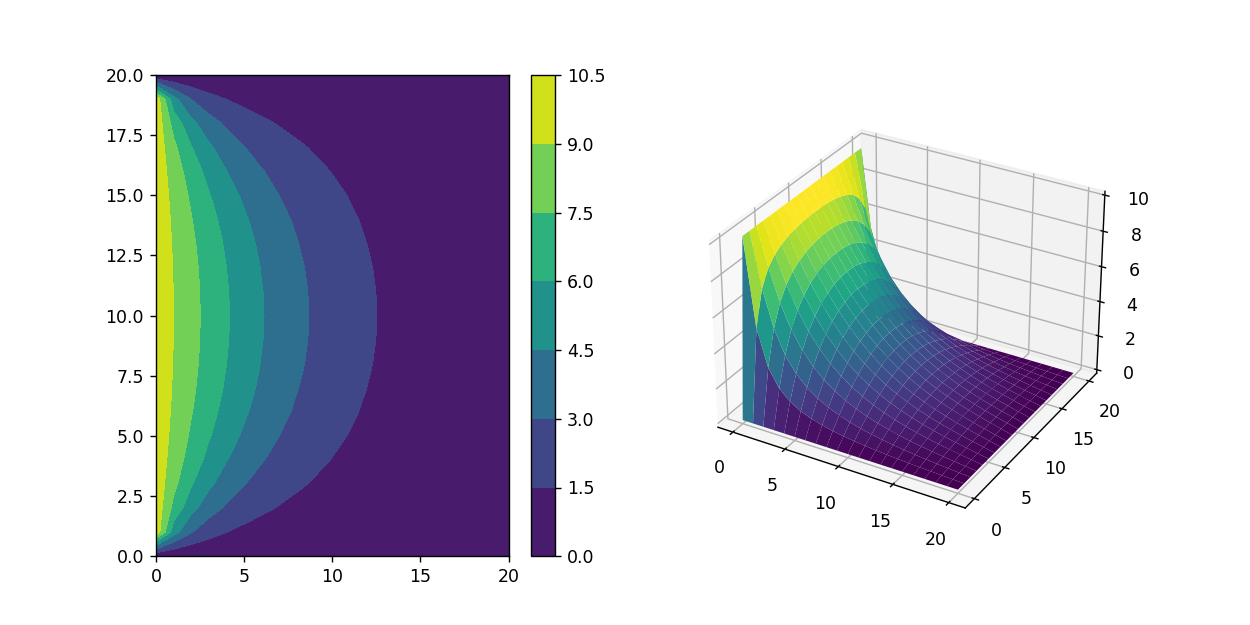

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X, Y, Tf1.T, cmap='viridis')
fig.colorbar(c, ax=ax)

ax1.plot_surface(X, Y, Tf1.T, cmap='viridis')
plt.show()